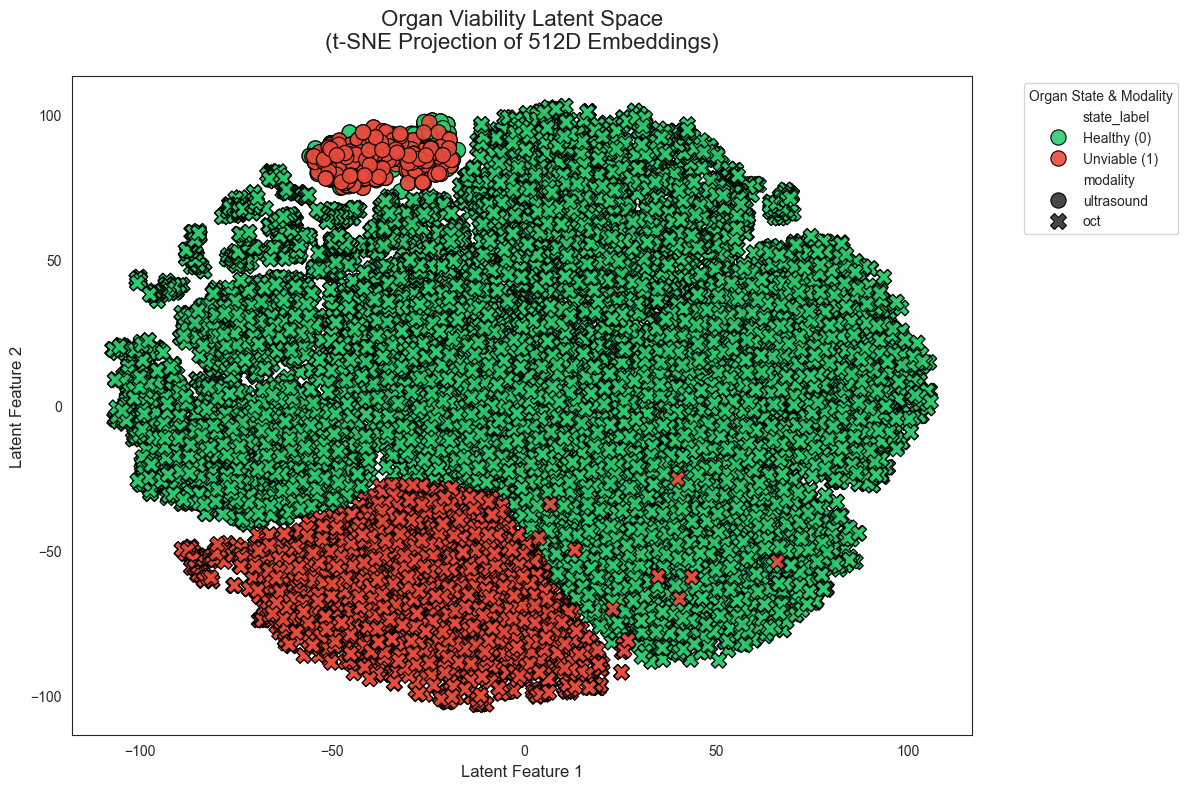

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

df = pd.read_csv('organ_embeddings.csv')

feature_cols = [col for col in df.columns if col.startswith('dim_')]
features = df[feature_cols].values


df['state_label'] = df['label'].map({0: 'Healthy (0)', 1: 'Unviable (1)'})

tsne = TSNE(n_components=2, perplexity=5, random_state=42, init='pca')
tsne_results = tsne.fit_transform(features)

plt.figure(figsize=(12, 8))
sns.set_style("white")

scatter = sns.scatterplot(
    x=tsne_results[:, 0], 
    y=tsne_results[:, 1],
    hue=df['state_label'],  
    style=df['modality'],   
    palette={'Healthy (0)': '#2ecc71', 'Unviable (1)': '#e74c3c'}, # Green vs Red
    s=120, 
    alpha=0.9,
    edgecolor='black'
)

plt.title("Organ Viability Latent Space\n(t-SNE Projection of 512D Embeddings)", fontsize=16, pad=20)
plt.xlabel("Latent Feature 1", fontsize=12)
plt.ylabel("Latent Feature 2", fontsize=12)
plt.legend(title="Organ State & Modality", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()